In [1]:
import matplotlib.pyplot as plt
import numpy as n1
import sol
import mod
import dgl
import pickle
import gzip
import temp_plot as tp

In [2]:
tm = mod.TempMod(dgl.T_punkt)
params = {
    'P': 2e3, # Power in W
    'T0_so': 293, # Initial temperature of source top in K
    'T0_sub': 293, # Initial temperature of substrate in K
    't_range': [0,10], # Time range in s (Only for continuous mode)
    'pulsed': True, # Pulsed mode
    'f': 0.1, # Frequency in Hz
    't_p': 0.3, # Pulse duration in s
    'n': 100, # Number of pulses
    'thick0': 0.0, # Initial thickness of the layer in m
    }

result = tm.mod(P=params['P'], T0_so=params['T0_so'], T0_sub=params['T0_sub'], pulsed=True, f=params['f'], t_p=params['t_p'], n=params['n'], gr_factor=dgl.c['gr_factor'], gr_exp=dgl.c['gr_exp'])

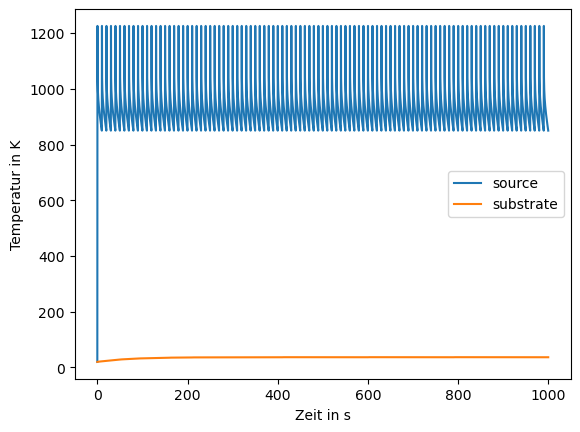

In [4]:
plt.plot(result['Time'], result['Temp_source']-273.15, label='source') # Plot mit Korrekturfaktor für Umrechnung von Kelvin in °C
plt.plot(result['Time'], result['Temp_substrate']-273.15, label='substrate')
plt.xlabel('Zeit in s')
plt.ylabel('Temperatur in K')
plt.legend()

In [4]:

n1 = 20
n2 = 20
t_p = [i*5e-5 for i in range(1, n1+1)]
rate_vals = [i*14*0.01 for i in range(1, n2+1)]

opt_power = sol.calc_p_opt_parallel(t_p, rate_vals)
temp = sol.calc_temp_parallel(t_p, rate_vals, opt_power)
    # Erstellen der Farbkarte



Calculation of optimal power values is running...
Calculation of optimal power values is done.
Calculation of temperatures is running...
Calculation of temperatures is done.


296.71274343260706 298.29021619251813


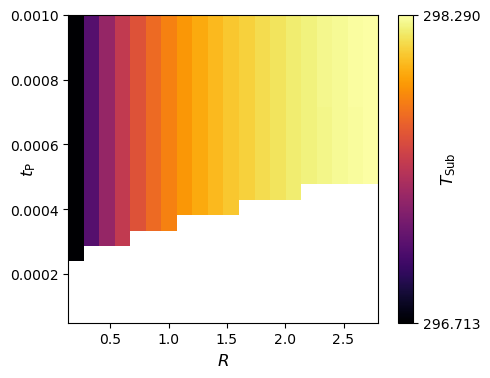

22864.712230147223 99282.89424839991


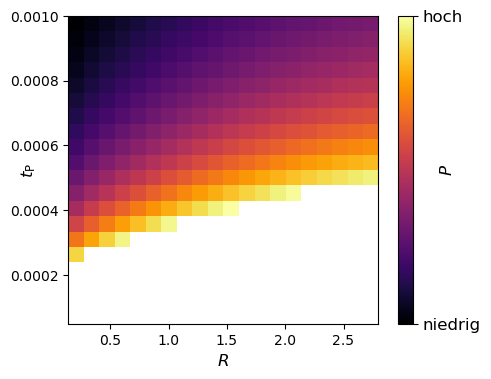

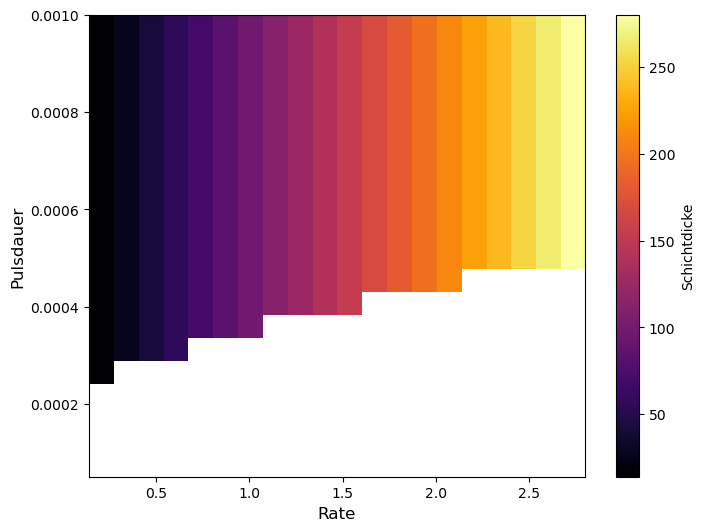

In [5]:
tp.create_tempmap(t_p, rate_vals, temp[0])
tp.create_powmap(t_p, rate_vals, opt_power)
tp.create_thickmap(t_p, rate_vals, temp[1])

In [6]:
#dat.gz:
c = {
    'source_therm_cap': 1e-2, # thermal capacity source
    'source_radiation': -3e-12, # radiative heat emission at source
    'laser_power': 0.5, # laser power
    'sub_therm_cap': 1e-6, # thermal capacity source
    'sub_absorption': 9e-7, # radiative heat absorption at substrate from source
    'sub_radiation': 1e0, # radiative heat emission at substrate
    'gr_factor': 8e3, # growth rate factor '' e^(-1/T)
    'gr_exp': 1.128e3, # growth rate exponent factor e^(- '' /T)
    }

#dat1.gz:
c = {
    'source_therm_cap': 1e2, # thermal capacity source
    'source_radiation': -3e-11, # radiative heat emission at source
    'laser_power': 0.5, # laser power
    'sub_therm_cap': 1e-6, # thermal capacity source
    'sub_absorption': 9e-7, # radiative heat absorption at substrate from source
    'sub_radiation': 1e0, # radiative heat emission at substrate
    'gr_factor': 8e0, # growth rate factor '' e^(-1/T)
    'gr_exp': 1.128e3, # growth rate exponent factor e^(- '' /T)
    }

#dat3.gz:
c = {
    'source_therm_cap': 0.133, # thermal capacity source
    'source_radiation': 4e-13*1e1, # radiative heat emission at source
    'laser_power': 0.5, # laser power
    'sub_therm_cap': 67.22, # thermal capacity source
    'sub_absorption': 1.88e-14*1e4, # radiative heat absorption at substrate from source
    'sub_radiation': 1.149e-11, # radiative heat emission at substrate
    'gr_factor': 8e4, # growth rate factor '' e^(-1/T)
    'gr_exp': 1.128e3, # growth rate exponent factor e^(- '' /T)
    'ambient_temperature': 0, # ambient temperature
    'vwl': 0, # verdampfungswärmeleistung
    'wl': 3, # wärmeleitung
    }

#dat4.gz:
c = {
    'source_therm_cap': 0.133, # thermal capacity source
    'source_radiation': 4e-13*1e1, # radiative heat emission at source
    'laser_power': 0.5, # laser power
    'sub_therm_cap': 67.22, # thermal capacity source
    'sub_absorption': 1.88e-14*1e4, # radiative heat absorption at substrate from source
    'sub_radiation': 1.149e-11, # radiative heat emission at substrate
    'gr_factor': 8e4, # growth rate factor '' e^(-1/T)
    'gr_exp': 1.128e3, # growth rate exponent factor e^(- '' /T)
    'ambient_temperature': 0, # ambient temperature
    'vwl': 0, # verdampfungswärmeleistung
    'wl': 3, # wärmeleitung
    }

In [7]:
sol.create_thickmap(rate_vals, t_p, temp[1])
#

# plt.savefig('boundaries.pdf', bbox_inches='tight')

AttributeError: module 'sol' has no attribute 'create_thickmap'

In [ ]:
# at the end of the simulation, write out the final state
datafilename = f'dat6.gz'


datafile = gzip.open(datafilename, 'wb')
pickle.dump([result, opt_power, temp], datafile)
datafile.close()

In [ ]:
import sol
import pickle
import gzip
import numpy as np

In [ ]:
datafilename = f'mit_vwl.gz'
with gzip.open(datafilename, 'rb') as datafile1:
    a, pow, tempetrs = pickle.load(datafile1)


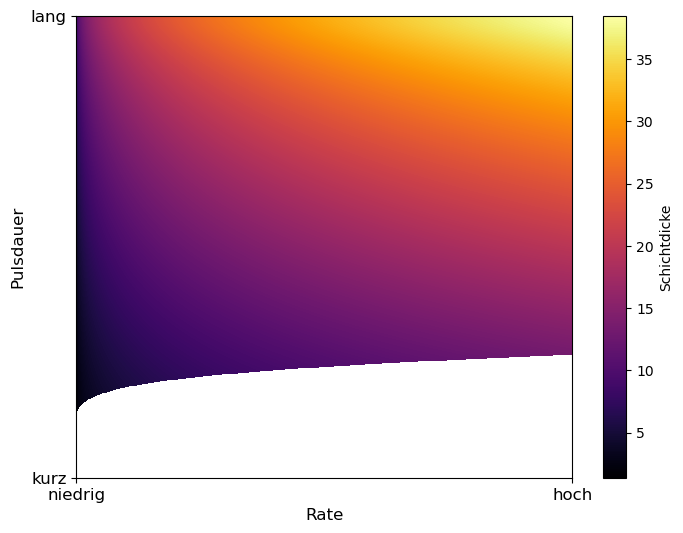

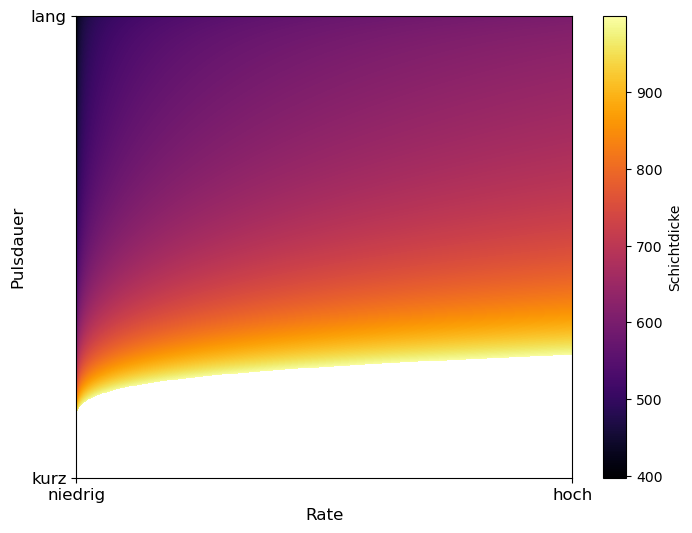

In [ ]:
n = 1000
t_p = [i*0.1 for i in range(1, n+1)]
rate_vals = [i*0.1 for i in range(1, n+1)]
sol.create_thickmap(rate_vals, t_p, tempetrs[0])
sol.create_thickmap(rate_vals, t_p, pow)
#sol.create_tempmap(rate_vals, t_p, tempetrs[1])



In [ ]:
from graphviz import Digraph

dot = Digraph(comment='Das Flowchart')

dot.attr('node', shape='box', fontname='Helvetica')
dot.attr('edge', fontname='Helvetica')

# Knoten hinzufügen
dot.node('A', 'Gitter (Raten, Pulsdauern)')
dot.node('B', 'Finden der optimalen Pulsleistung')
dot.node('C', 'DGL-System')
dot.node('D', 'Berechnung der Temperatur')

# Kanten hinzufügen
dot.edges(['AB', 'CB', 'CD', 'BD'])
#dot.edge('C', 'E', label='Weg 1')
#dot.edge('D', 'E', label='Weg 2')

# Flowchart rendern und als Bild speichern
dot.render('test-output/flowchart', view=True)  # 'view=True' öffnet das Bild


'test-output\\flowchart.pdf'